In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Посмотрим на тренировочную выборку и разметим её

In [2]:
chunksize = 10 ** 7
num_of_chunk = 0
train = pd.DataFrame()

for chunk in pd.read_csv('/kaggle/input/avazu-ctr-prediction/train.gz',chunksize=chunksize):
    num_of_chunk = num_of_chunk + 1
    train = pd.concat([train,chunk.sample(frac=0.01)],axis = 0,ignore_index = True)
    print(f'NUMBER {str(num_of_chunk)} is done.')

NUMBER 1 is done.
NUMBER 2 is done.
NUMBER 3 is done.
NUMBER 4 is done.
NUMBER 5 is done.


In [3]:
train

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.720028e+19,0,14102123,1010,1,85f751fd,c4e18dd6,50e219e0,c7f29df3,7801e8d9,...,4,0,21790,320,50,2513,3,35,-1,68
1,1.100559e+19,0,14102210,1005,0,5bcf81a2,9d54950b,f028772b,ecad2386,7801e8d9,...,1,2,21770,320,50,2507,0,35,-1,157
2,1.334930e+19,0,14102110,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,21757,320,50,2502,0,35,100084,221
3,2.207712e+18,0,14102205,1005,1,856e6d3f,58a89a43,f028772b,ecad2386,7801e8d9,...,1,0,16208,320,50,1800,3,167,100079,23
4,7.586763e+18,0,14102106,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15703,320,50,1722,0,35,100083,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404285,1.093288e+17,0,14103022,1005,0,85f751fd,c4e18dd6,50e219e0,d44c074c,ae637522,...,1,3,23742,320,50,2721,1,161,100193,71
404286,2.575791e+18,0,14103022,1005,0,85f751fd,c4e18dd6,50e219e0,73206397,2347f47a,...,1,0,22816,320,50,2648,3,39,100148,23
404287,1.020877e+19,0,14103020,1005,0,47753f16,9ece7167,f028772b,ecad2386,7801e8d9,...,1,0,16858,320,50,1887,3,39,100199,23
404288,1.535432e+19,1,14103022,1005,0,85f751fd,c4e18dd6,50e219e0,9c13b419,2347f47a,...,1,0,23725,320,50,2716,3,47,-1,23


In [4]:
train = train.drop(columns=['id', 'site_id', 'site_domain', 'app_id',
                            'app_domain', 'device_id', 'device_ip', 'device_model'])

In [5]:
train

,click,hour,C1,banner_pos,site_category,app_category,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,0,14102123,1010,1,50e219e0,0f2161f8,4,0,21790,320,50,2513,3,35,-1,68
1,0,14102210,1005,0,f028772b,07d7df22,1,2,21770,320,50,2507,0,35,-1,157
2,0,14102110,1005,0,28905ebd,07d7df22,1,0,21757,320,50,2502,0,35,100084,221
3,0,14102205,1005,1,f028772b,07d7df22,1,0,16208,320,50,1800,3,167,100079,23
4,0,14102106,1005,0,28905ebd,07d7df22,1,0,15703,320,50,1722,0,35,100083,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404285,0,14103022,1005,0,50e219e0,cef3e649,1,3,23742,320,50,2721,1,161,100193,71
404286,0,14103022,1005,0,50e219e0,8ded1f7a,1,0,22816,320,50,2648,3,39,100148,23
404287,0,14103020,1005,0,f028772b,07d7df22,1,0,16858,320,50,1887,3,39,100199,23
404288,1,14103022,1005,0,50e219e0,f95efa07,1,0,23725,320,50,2716,3,47,-1,23


In [6]:
train['hour'] = pd.to_datetime(train['hour'], format = '%y%m%d%H')

In [7]:
train

,click,hour,C1,banner_pos,site_category,app_category,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,0,2014-10-21 23:00:00,1010,1,50e219e0,0f2161f8,4,0,21790,320,50,2513,3,35,-1,68
1,0,2014-10-22 10:00:00,1005,0,f028772b,07d7df22,1,2,21770,320,50,2507,0,35,-1,157
2,0,2014-10-21 10:00:00,1005,0,28905ebd,07d7df22,1,0,21757,320,50,2502,0,35,100084,221
3,0,2014-10-22 05:00:00,1005,1,f028772b,07d7df22,1,0,16208,320,50,1800,3,167,100079,23
4,0,2014-10-21 06:00:00,1005,0,28905ebd,07d7df22,1,0,15703,320,50,1722,0,35,100083,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404285,0,2014-10-30 22:00:00,1005,0,50e219e0,cef3e649,1,3,23742,320,50,2721,1,161,100193,71
404286,0,2014-10-30 22:00:00,1005,0,50e219e0,8ded1f7a,1,0,22816,320,50,2648,3,39,100148,23
404287,0,2014-10-30 20:00:00,1005,0,f028772b,07d7df22,1,0,16858,320,50,1887,3,39,100199,23
404288,1,2014-10-30 22:00:00,1005,0,50e219e0,f95efa07,1,0,23725,320,50,2716,3,47,-1,23


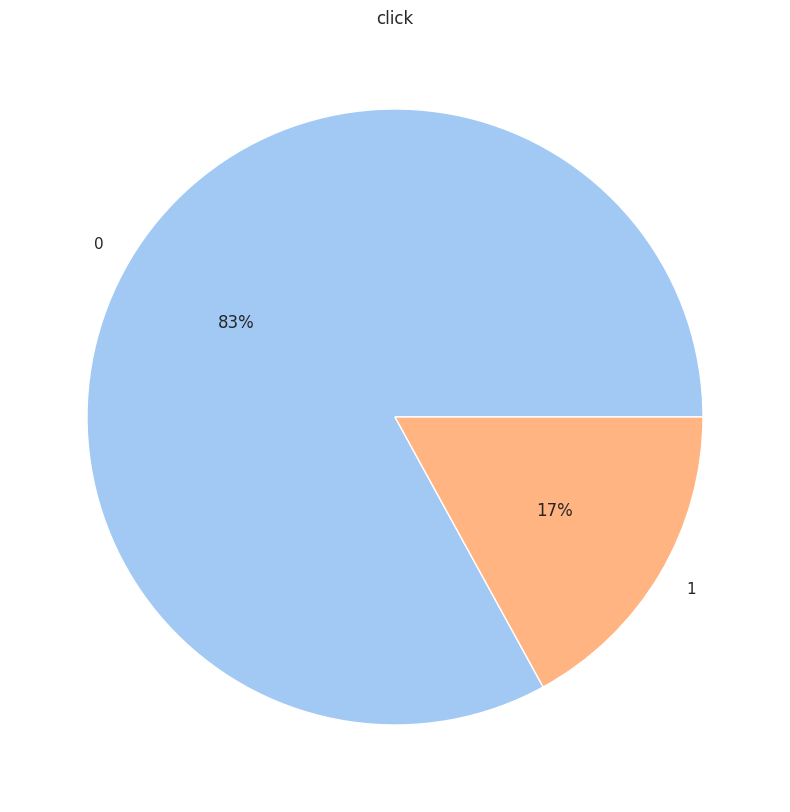

In [8]:
sns.set(rc={'figure.figsize': (10, 10)})
colors = sns.color_palette('pastel')[0:5]
labels = sorted(train['click'].unique())
dt = np.array([len(train[train['click'] == i])for i in labels])
plt.pie(dt, labels=labels, colors=colors, autopct='%.0f%%')
plt.title('click')
plt.show()

<Axes: xlabel='hour', ylabel='click'>

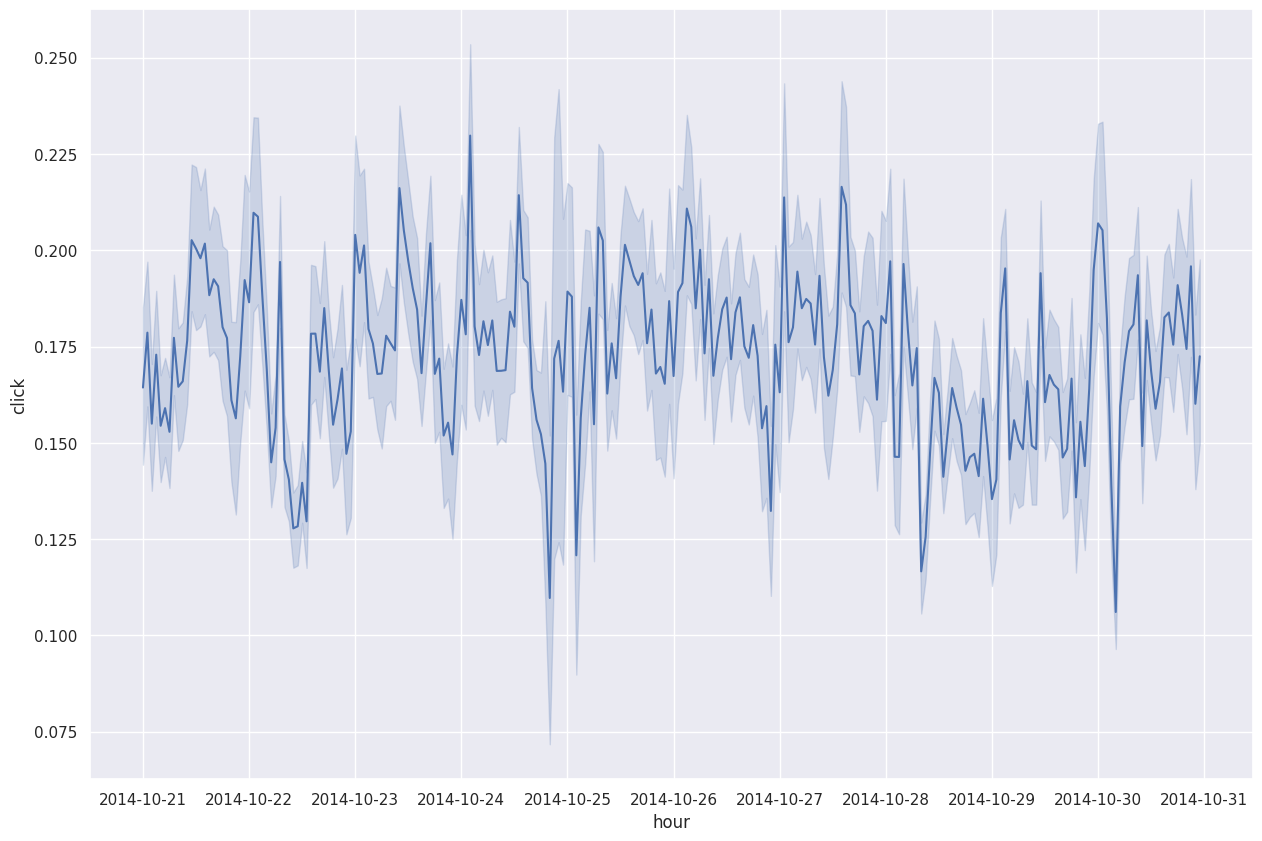

In [9]:
sns.set(rc={'figure.figsize': (15, 10)})

sns.lineplot(data=train, x='hour', y='click')

In [10]:
features = {
    'hour': [],
    'day': []
}

for elem in train['hour'].map(str):
    year, month, day_hour = map(lambda x: int(x) if ' ' not in x else x, elem[:-6].split('-'))
    day, hour = map(int, day_hour.split())
    features['day'].append(day)
    features['hour'].append(hour)

for elem in features:
    train[elem] = features[elem]

In [11]:
train

,click,hour,C1,banner_pos,site_category,app_category,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,day
0,0,23,1010,1,50e219e0,0f2161f8,4,0,21790,320,50,2513,3,35,-1,68,21
1,0,10,1005,0,f028772b,07d7df22,1,2,21770,320,50,2507,0,35,-1,157,22
2,0,10,1005,0,28905ebd,07d7df22,1,0,21757,320,50,2502,0,35,100084,221,21
3,0,5,1005,1,f028772b,07d7df22,1,0,16208,320,50,1800,3,167,100079,23,22
4,0,6,1005,0,28905ebd,07d7df22,1,0,15703,320,50,1722,0,35,100083,79,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404285,0,22,1005,0,50e219e0,cef3e649,1,3,23742,320,50,2721,1,161,100193,71,30
404286,0,22,1005,0,50e219e0,8ded1f7a,1,0,22816,320,50,2648,3,39,100148,23,30
404287,0,20,1005,0,f028772b,07d7df22,1,0,16858,320,50,1887,3,39,100199,23,30
404288,1,22,1005,0,50e219e0,f95efa07,1,0,23725,320,50,2716,3,47,-1,23,30


In [12]:
train.isnull().sum()

click               0
hour                0
C1                  0
banner_pos          0
site_category       0
app_category        0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
C20                 0
C21                 0
day                 0
dtype: int64

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   click             404290 non-null  int64 
 1   hour              404290 non-null  int64 
 2   C1                404290 non-null  int64 
 3   banner_pos        404290 non-null  int64 
 4   site_category     404290 non-null  object
 5   app_category      404290 non-null  object
 6   device_type       404290 non-null  int64 
 7   device_conn_type  404290 non-null  int64 
 8   C14               404290 non-null  int64 
 9   C15               404290 non-null  int64 
 10  C16               404290 non-null  int64 
 11  C17               404290 non-null  int64 
 12  C18               404290 non-null  int64 
 13  C19               404290 non-null  int64 
 14  C20               404290 non-null  int64 
 15  C21               404290 non-null  int64 
 16  day               404290 non-null  int

In [14]:
train['site_category'] = train['site_category'].astype('category')
train['site_category'] = train['site_category'].cat.codes

train['app_category'] = train['app_category'].astype('category')
train['app_category'] = train['app_category'].cat.codes

In [15]:
train

,click,hour,C1,banner_pos,site_category,app_category,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,day
0,0,23,1010,1,5,3,4,0,21790,320,50,2513,3,35,-1,68,21
1,0,10,1005,0,18,0,1,2,21770,320,50,2507,0,35,-1,157,22
2,0,10,1005,0,1,0,1,0,21757,320,50,2502,0,35,100084,221,21
3,0,5,1005,1,18,0,1,0,16208,320,50,1800,3,167,100079,23,22
4,0,6,1005,0,1,0,1,0,15703,320,50,1722,0,35,100083,79,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404285,0,22,1005,0,5,19,1,3,23742,320,50,2721,1,161,100193,71,30
404286,0,22,1005,0,5,15,1,0,22816,320,50,2648,3,39,100148,23,30
404287,0,20,1005,0,18,0,1,0,16858,320,50,1887,3,39,100199,23,30
404288,1,22,1005,0,5,22,1,0,23725,320,50,2716,3,47,-1,23,30


In [16]:
train.describe()

,click,hour,C1,banner_pos,site_category,app_category,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,day
count,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000
mean,0.170125,11.290141,1004.969693,0.286819,8.299293,2.823753,1.015813,0.329511,18846.610718,318.936565,60.212719,2113.183697,1.428907,227.242442,53137.552462,83.517732,25.468889
std,0.375743,5.952944,1.093735,0.506461,6.833100,5.825886,0.526904,0.852595,4957.541634,21.623466,47.685704,609.009867,1.326706,351.138078,49961.692887,70.332962,2.963037
min,0.000000,0.000000,1001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,375.000000,120.000000,20.000000,112.000000,0.000000,33.000000,-1.000000,1.000000,21.000000
25%,0.000000,7.000000,1005.000000,0.000000,3.000000,0.000000,1.000000,0.000000,16920.000000,320.000000,50.000000,1863.000000,0.000000,35.000000,-1.000000,23.000000,23.000000
50%,0.000000,11.000000,1005.000000,0.000000,5.000000,0.000000,1.000000,0.000000,20346.000000,320.000000,50.000000,2323.000000,2.000000,39.000000,100048.000000,61.000000,26.000000
75%,0.000000,16.000000,1005.000000,1.000000,18.000000,3.000000,1.000000,0.000000,21894.000000,320.000000,50.000000,2526.000000,3.000000,171.000000,100084.000000,104.000000,28.000000
max,1.000000,23.000000,1012.000000,7.000000,19.000000,23.000000,5.000000,5.000000,24052.000000,1024.000000,1024.000000,2758.000000,3.000000,1839.000000,100248.000000,255.000000,30.000000


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   click             404290 non-null  int64
 1   hour              404290 non-null  int64
 2   C1                404290 non-null  int64
 3   banner_pos        404290 non-null  int64
 4   site_category     404290 non-null  int8 
 5   app_category      404290 non-null  int8 
 6   device_type       404290 non-null  int64
 7   device_conn_type  404290 non-null  int64
 8   C14               404290 non-null  int64
 9   C15               404290 non-null  int64
 10  C16               404290 non-null  int64
 11  C17               404290 non-null  int64
 12  C18               404290 non-null  int64
 13  C19               404290 non-null  int64
 14  C20               404290 non-null  int64
 15  C21               404290 non-null  int64
 16  day               404290 non-null  int64
dtypes: int64(1

<Axes: >

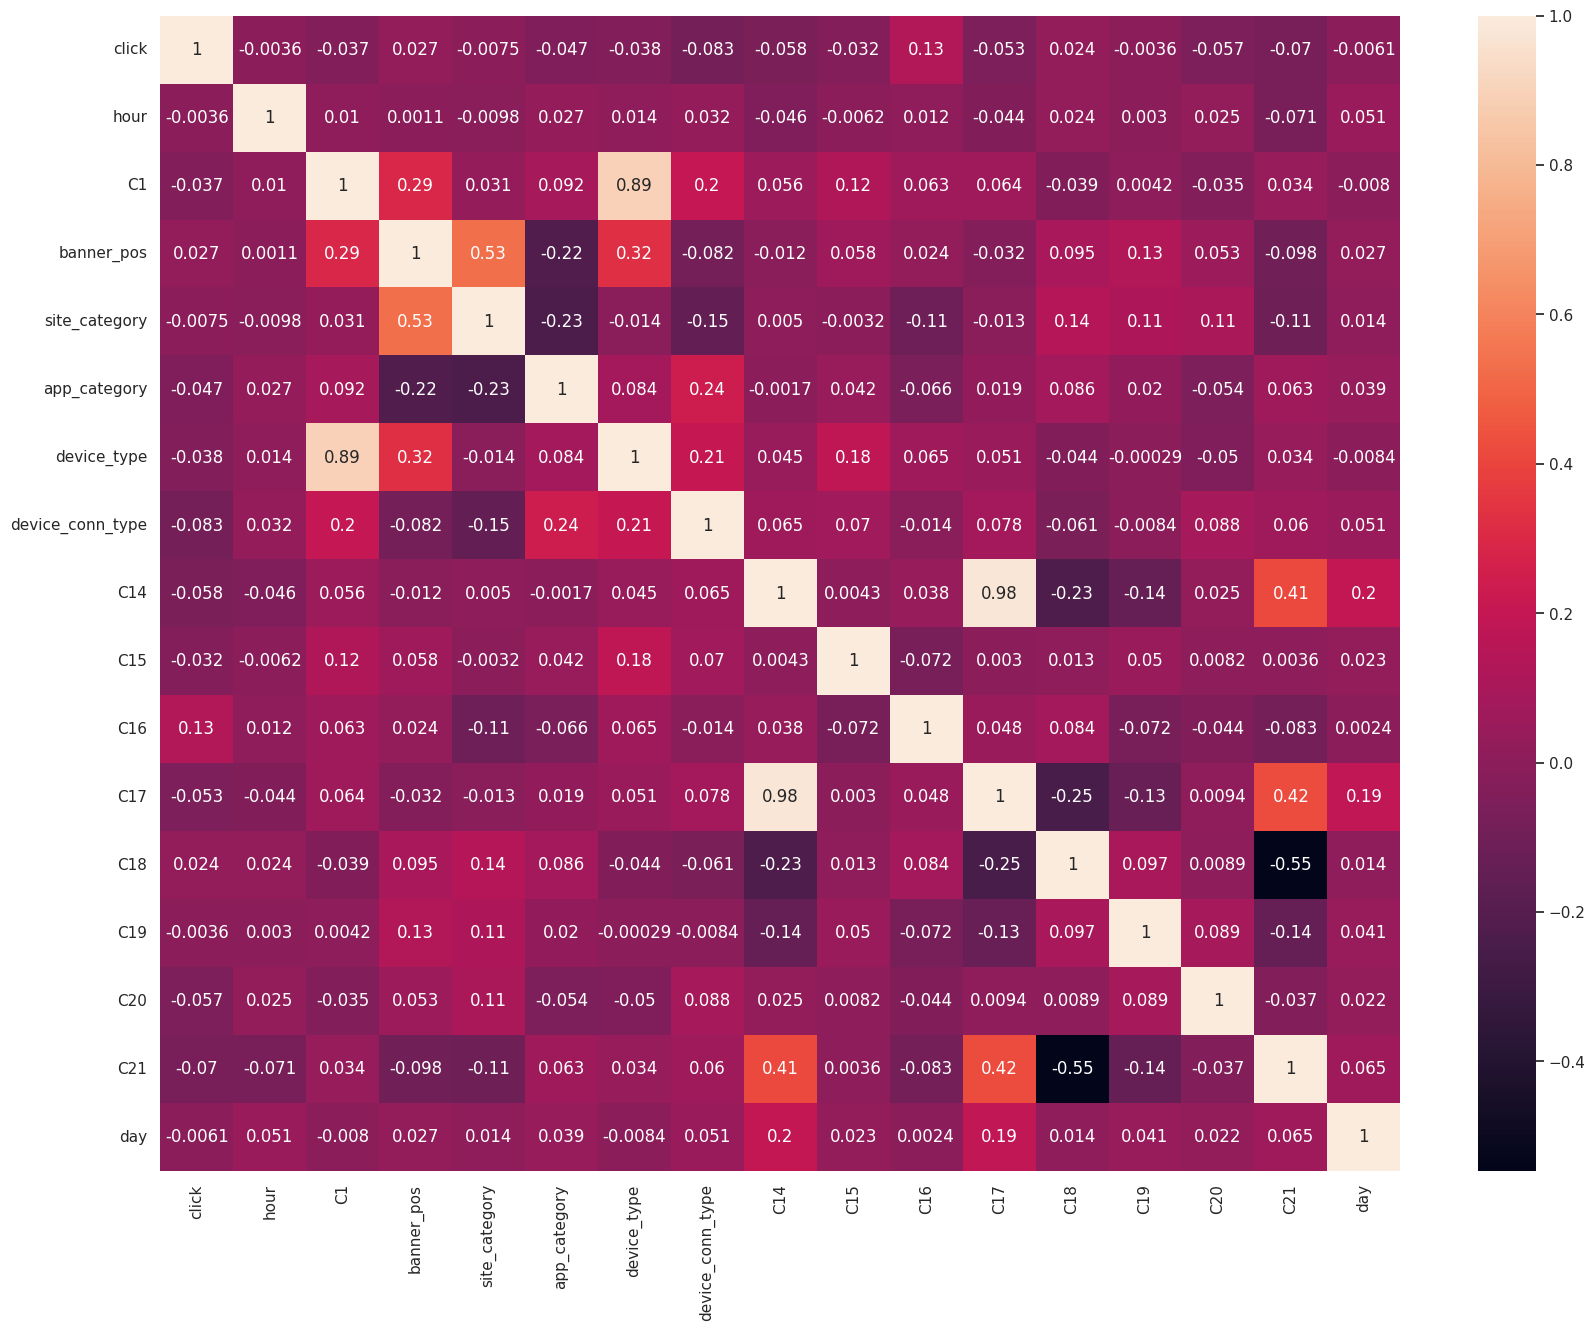

In [18]:
corr_matrix = train.corr()

sns.set(rc={'figure.figsize': (20, 15)})

sns.heatmap(corr_matrix, annot=True)

In [19]:
import math
from sklearn import preprocessing

scaled = preprocessing.StandardScaler()

scaled.fit(train.drop(columns=['click']), train['click'])

# def scale_features(X, Y):
#     scaled = .fit_transform(X, Y)
#     scaled = pd.DataFrame(scaled, columns=df.columns)
#     return scaled

StandardScaler()

In [20]:
df_scaled = scaled.transform(train.drop(columns=['click']))

In [21]:
df_scaled

array([[ 1.96707281,  4.5992051 ,  1.40816891, ..., -1.06358722,
        -0.2206327 , -1.50821406],
       [-0.21672342,  0.02771007, -0.56632094, ..., -1.06358722,
         1.04477839, -1.17072208],
       [-0.21672342,  0.02771007, -0.56632094, ...,  0.93965002,
         1.95473693, -1.50821406],
       ...,
       [ 1.46311983,  0.02771007, -0.56632094, ...,  0.94195178,
        -0.8604473 ,  1.52921371],
       [ 1.79908848,  0.02771007, -0.56632094, ..., -1.06358722,
        -0.8604473 ,  1.52921371],
       [ 1.29513551,  0.02771007, -0.56632094, ..., -1.06358722,
        -0.8604473 ,  1.52921371]])

In [22]:
df_scaled.shape

(404290, 16)

In [23]:
from sklearn.decomposition import PCA

In [24]:
pca = PCA(n_components=8)
pca.fit(df_scaled)
print(pca.explained_variance_ratio_)

[0.16342559 0.1372313  0.10940224 0.0791996  0.07606564 0.0638109
 0.06149298 0.05745879]


In [25]:
print(pca.components_)

[[ 4.32254165e-02 -1.41861596e-01  7.40388361e-02  1.20370384e-01
  -7.06138284e-02 -1.39963546e-01 -1.41416910e-01 -5.28150256e-01
  -2.93989703e-02 -8.65194837e-03 -5.35196670e-01  3.36857602e-01
   1.56644340e-01  2.03201617e-02 -4.35716485e-01 -1.37374094e-01]
 [ 2.56703624e-02  5.85632107e-01  4.19691954e-01  2.01649738e-01
   2.64567583e-03  5.94344753e-01  1.42240499e-01 -4.41652778e-02
   1.80602685e-01  4.42420098e-02 -4.57227399e-02  8.56284070e-02
   1.00896735e-01  1.48590024e-02 -9.86807672e-02 -4.29924211e-04]
 [ 5.79557556e-02  1.71510706e-01 -4.21458107e-01 -5.44797200e-01
   4.46572145e-01  1.85540616e-01  3.42680008e-01 -2.29439499e-01
   8.31876546e-02  3.40906640e-02 -2.07680153e-01 -1.46576255e-02
  -8.91360257e-02 -1.41009200e-01 -7.62126014e-03 -9.77499408e-02]
 [ 1.97263249e-01 -1.20568336e-01 -3.36884616e-02  7.46980952e-02
   3.33069696e-01 -1.26543492e-01  3.09987290e-01  1.73292781e-01
   1.53071161e-01 -1.47392759e-01  1.65689946e-01  3.45056035e-01
   3.44

In [26]:
zzz = pca.transform(df_scaled)

In [27]:
zzz

array([[-1.33113227e+00,  6.54477395e+00,  1.55903891e+00, ...,
        -6.05504271e-01,  1.39771299e+00, -2.48461519e-01],
       [-1.54469642e+00, -3.23552657e-03, -4.49270656e-02, ...,
        -1.34129138e-01, -2.65697854e-01, -1.23137919e-01],
       [-1.81606803e+00, -8.97976657e-01,  2.52504042e-01, ...,
        -8.09079581e-01, -8.11640258e-01,  7.09082057e-01],
       ...,
       [ 1.19129410e+00,  2.07953559e-01, -8.79020408e-01, ...,
        -9.23691673e-01,  1.05863630e+00,  5.10694653e-01],
       [-7.87127971e-01, -3.07987930e-01,  1.54355843e+00, ...,
         8.84509459e-01,  2.12483416e+00, -7.25746052e-01],
       [ 3.64229122e-01, -2.23780930e-01,  2.00083384e+00, ...,
         9.91582641e-01,  1.91715438e+00, -8.63396150e-01]])

In [28]:
zzz.shape

(404290, 8)

In [29]:
pd.DataFrame(pca.components_, columns=train.columns[1:])

,hour,C1,banner_pos,site_category,app_category,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,day
0,0.043225,-0.141862,0.074039,0.120370,-0.070614,-0.139964,-0.141417,-0.528150,-0.029399,-0.008652,-0.535197,0.336858,0.156644,0.020320,-0.435716,-0.137374
1,0.025670,0.585632,0.419692,0.201650,0.002646,0.594345,0.142240,-0.044165,0.180603,0.044242,-0.045723,0.085628,0.100897,0.014859,-0.098681,-0.000430
2,0.057956,0.171511,-0.421458,-0.544797,0.446572,0.185541,0.342680,-0.229439,0.083188,0.034091,-0.207680,-0.014658,-0.089136,-0.141009,-0.007621,-0.097750
3,0.197263,-0.120568,-0.033688,0.074698,0.333070,-0.126543,0.309987,0.173293,0.153071,-0.147393,0.165690,0.345056,0.344031,0.356358,-0.198684,0.458550
4,0.107694,0.038711,-0.022432,-0.109692,-0.022376,0.028467,-0.099160,0.187978,-0.242262,0.654445,0.187127,0.408609,-0.261816,-0.229911,-0.303139,0.160068
5,-0.604220,-0.039171,-0.014290,0.027110,0.206234,-0.021038,-0.217725,0.088080,0.371501,-0.175220,0.087974,0.254556,0.112527,-0.518396,-0.051398,0.094955
6,0.677382,-0.011560,0.042401,0.028525,0.007587,0.009597,-0.250523,-0.061010,0.161757,-0.227055,-0.058822,-0.097440,-0.043592,-0.513482,0.084057,0.329349
7,0.121146,-0.094717,-0.091315,-0.107748,-0.284553,-0.034155,-0.044703,0.042099,0.816757,0.170447,0.032681,0.036419,-0.283029,0.251275,-0.099018,-0.137513


In [30]:
pd.Series(pca.noise_variance_, train.columns[1:])

hour                0.503827
C1                  0.503827
banner_pos          0.503827
site_category       0.503827
app_category        0.503827
device_type         0.503827
device_conn_type    0.503827
C14                 0.503827
C15                 0.503827
C16                 0.503827
C17                 0.503827
C18                 0.503827
C19                 0.503827
C20                 0.503827
C21                 0.503827
day                 0.503827
dtype: float64

In [62]:
from sklearn.model_selection import train_test_split
Y = train['click']

X_train, X_valid, Y_train, Y_valid = train_test_split(zzz, Y, test_size=0.15, random_state=2023)

In [63]:
from catboost import CatBoostClassifier

In [67]:
cat = CatBoostClassifier(
    verbose=3000,
    iterations=9000,
    
    task_type='GPU',
    learning_rate=0.0025,
    l2_leaf_reg=0.03,
    grow_policy='Depthwise',
    depth=7,
    leaf_estimation_method='Newton',
    leaf_estimation_iterations=50,
    
    use_best_model=True)

cat.fit(X_train, Y_train, eval_set=(X_valid, Y_valid))

0:	learn: 0.6915808	test: 0.6915871	best: 0.6915871 (0)	total: 59.5ms	remaining: 8m 55s
3000:	learn: 0.4114384	test: 0.4231671	best: 0.4231670 (2999)	total: 2m 16s	remaining: 4m 32s
6000:	learn: 0.4038580	test: 0.4221791	best: 0.4221791 (6000)	total: 4m 30s	remaining: 2m 15s
8999:	learn: 0.3982586	test: 0.4221099	best: 0.4220549 (7420)	total: 6m 46s	remaining: 0us
bestTest = 0.422054905
bestIteration = 7420
Shrink model to first 7421 iterations.


In [68]:
from sklearn.metrics import accuracy_score


preds_val = cat.predict(X_valid)

accuracy_score(preds_val, Y_valid)

0.8298265285931007

# Тоже самое сделаем с тестовой выбокрой

In [69]:
test_df = pd.read_csv("/kaggle/input/avazu-ctr-prediction/test.gz", header=0, dtype=str)

In [70]:
test_df = test_df.drop(columns=['id', 'site_id', 'site_domain', 'app_id',
                            'app_domain', 'device_id', 'device_ip', 'device_model'])

test_df['hour'] = pd.to_datetime(test_df['hour'], format = '%y%m%d%H')
features = {
    'hour': [],
    'day': []
}

for elem in test_df['hour'].map(str):
    year, month, day_hour = map(lambda x: int(x) if ' ' not in x else x, elem[:-6].split('-'))
    day, hour = map(int, day_hour.split())
    features['day'].append(day)
    features['hour'].append(hour)

for elem in features:
    test_df[elem] = features[elem]

In [71]:
test_df

,hour,C1,banner_pos,site_category,app_category,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,day
0,0,1005,0,f028772b,07d7df22,1,0,8330,320,50,761,3,175,100075,23,31
1,0,1005,0,28905ebd,07d7df22,1,0,22676,320,50,2616,0,35,100083,51,31
2,0,1005,0,28905ebd,07d7df22,1,0,22676,320,50,2616,0,35,100083,51,31
3,0,1005,0,50e219e0,0f2161f8,1,0,18648,320,50,1092,3,809,100156,61,31
4,0,1005,0,50e219e0,f95efa07,1,0,23160,320,50,2667,0,47,-1,221,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4577459,23,1005,0,3e814130,07d7df22,1,0,17654,300,250,1994,2,39,-1,33,31
4577460,23,1005,0,f028772b,07d7df22,1,0,22104,320,50,2545,0,431,100084,221,31
4577461,23,1005,0,3e814130,07d7df22,1,0,17654,300,250,1994,2,39,-1,33,31
4577462,23,1005,0,50e219e0,0f2161f8,1,3,23857,320,50,2734,1,175,100189,71,31


In [72]:
test_df.isnull().sum()

hour                0
C1                  0
banner_pos          0
site_category       0
app_category        0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
C20                 0
C21                 0
day                 0
dtype: int64

In [73]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4577464 entries, 0 to 4577463
Data columns (total 16 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   hour              int64 
 1   C1                object
 2   banner_pos        object
 3   site_category     object
 4   app_category      object
 5   device_type       object
 6   device_conn_type  object
 7   C14               object
 8   C15               object
 9   C16               object
 10  C17               object
 11  C18               object
 12  C19               object
 13  C20               object
 14  C21               object
 15  day               int64 
dtypes: int64(2), object(14)
memory usage: 558.8+ MB


In [74]:
test_df['site_category'] = test_df['site_category'].astype('category')
test_df['site_category'] = test_df['site_category'].cat.codes

test_df['app_category'] = test_df['app_category'].astype('category')
test_df['app_category'] = test_df['app_category'].cat.codes

In [75]:
test_df

,hour,C1,banner_pos,site_category,app_category,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,day
0,0,1005,0,20,0,1,0,8330,320,50,761,3,175,100075,23,31
1,0,1005,0,1,0,1,0,22676,320,50,2616,0,35,100083,51,31
2,0,1005,0,1,0,1,0,22676,320,50,2616,0,35,100083,51,31
3,0,1005,0,5,3,1,0,18648,320,50,1092,3,809,100156,61,31
4,0,1005,0,5,26,1,0,23160,320,50,2667,0,47,-1,221,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4577459,23,1005,0,3,0,1,0,17654,300,250,1994,2,39,-1,33,31
4577460,23,1005,0,20,0,1,0,22104,320,50,2545,0,431,100084,221,31
4577461,23,1005,0,3,0,1,0,17654,300,250,1994,2,39,-1,33,31
4577462,23,1005,0,5,3,1,3,23857,320,50,2734,1,175,100189,71,31


# Предскажем тест

In [76]:
test_df_scaled = scaled.transform(test_df)

In [77]:
test_df_scaled

array([[-1.89656668,  0.02771007, -0.56632094, ...,  0.93946988,
        -0.8604473 ,  1.86670568],
       [-1.89656668,  0.02771007, -0.56632094, ...,  0.93963   ,
        -0.46234044,  1.86670568],
       [-1.89656668,  0.02771007, -0.56632094, ...,  0.93963   ,
        -0.46234044,  1.86670568],
       ...,
       [ 1.96707281,  0.02771007, -0.56632094, ..., -1.06358722,
        -0.71826628,  1.86670568],
       [ 1.96707281,  0.02771007, -0.56632094, ...,  0.94175163,
        -0.1779784 ,  1.86670568],
       [ 1.96707281,  0.02771007, -0.56632094, ...,  0.93965002,
         1.95473693,  1.86670568]])

In [78]:
test_df_zzz = pca.transform(test_df_scaled)

In [79]:
test_df_zzz

array([[ 2.993616  ,  0.38013784, -0.52169051, ...,  0.87697515,
        -0.89955696, -0.21735242],
       [-1.49723507, -0.72077697, -0.23773446, ...,  0.68341937,
        -1.06349367,  0.29473226],
       [-1.49723507, -0.72077697, -0.23773446, ...,  0.68341937,
        -1.06349367,  0.29473226],
       ...,
       [ 0.35794012, -0.32690042,  0.59860997, ..., -1.46407713,
         1.44170211,  0.18833741],
       [-1.83074028,  0.05566752,  0.95905636, ..., -2.03605365,
         0.59882134,  0.29924245],
       [-1.76467736, -0.17653268, -1.60387563, ..., -1.59077987,
         1.79903607, -0.10271791]])

In [80]:
predict_test = cat.predict(test_df_zzz)

In [81]:
predict_test

array([0, 0, 0, ..., 0, 0, 0])

In [82]:
len([i for i in predict_test if i == 1])

60040

In [83]:
len([i for i in predict_test if i == 0])

4517424

# Сохраним ответ

In [84]:
submit_df = pd.read_csv("/kaggle/input/avazu-ctr-prediction/test.gz", header=0, dtype=str)

In [85]:
submit_df

,id,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,10000174058809263569,14103100,1005,0,235ba823,f6ebf28e,f028772b,ecad2386,7801e8d9,07d7df22,...,1,0,8330,320,50,761,3,175,100075,23
1,10000182526920855428,14103100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,1,0,22676,320,50,2616,0,35,100083,51
2,10000554139829213984,14103100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,1,0,22676,320,50,2616,0,35,100083,51
3,10001094637809798845,14103100,1005,0,85f751fd,c4e18dd6,50e219e0,51cedd4e,aefc06bd,0f2161f8,...,1,0,18648,320,50,1092,3,809,100156,61
4,10001377041558670745,14103100,1005,0,85f751fd,c4e18dd6,50e219e0,9c13b419,2347f47a,f95efa07,...,1,0,23160,320,50,2667,0,47,-1,221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4577459,9998166651591969718,14103123,1005,0,93eaba74,7687a86e,3e814130,ecad2386,7801e8d9,07d7df22,...,1,0,17654,300,250,1994,2,39,-1,33
4577460,9998249812366450951,14103123,1005,0,17d1b03f,f3845767,f028772b,ecad2386,7801e8d9,07d7df22,...,1,0,22104,320,50,2545,0,431,100084,221
4577461,99988023653614546,14103123,1005,0,5b08c53b,7687a86e,3e814130,ecad2386,7801e8d9,07d7df22,...,1,0,17654,300,250,1994,2,39,-1,33
4577462,9999086574712596585,14103123,1005,0,85f751fd,c4e18dd6,50e219e0,92f5800b,ae637522,0f2161f8,...,1,3,23857,320,50,2734,1,175,100189,71


In [86]:
submit_df.columns

Index(['id', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21'],
      dtype='object')

In [87]:
test_df = pd.read_csv("/kaggle/input/avazu-ctr-prediction/test.gz", header=0, dtype=str)

In [88]:
test_df

,id,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,10000174058809263569,14103100,1005,0,235ba823,f6ebf28e,f028772b,ecad2386,7801e8d9,07d7df22,...,1,0,8330,320,50,761,3,175,100075,23
1,10000182526920855428,14103100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,1,0,22676,320,50,2616,0,35,100083,51
2,10000554139829213984,14103100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,1,0,22676,320,50,2616,0,35,100083,51
3,10001094637809798845,14103100,1005,0,85f751fd,c4e18dd6,50e219e0,51cedd4e,aefc06bd,0f2161f8,...,1,0,18648,320,50,1092,3,809,100156,61
4,10001377041558670745,14103100,1005,0,85f751fd,c4e18dd6,50e219e0,9c13b419,2347f47a,f95efa07,...,1,0,23160,320,50,2667,0,47,-1,221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4577459,9998166651591969718,14103123,1005,0,93eaba74,7687a86e,3e814130,ecad2386,7801e8d9,07d7df22,...,1,0,17654,300,250,1994,2,39,-1,33
4577460,9998249812366450951,14103123,1005,0,17d1b03f,f3845767,f028772b,ecad2386,7801e8d9,07d7df22,...,1,0,22104,320,50,2545,0,431,100084,221
4577461,99988023653614546,14103123,1005,0,5b08c53b,7687a86e,3e814130,ecad2386,7801e8d9,07d7df22,...,1,0,17654,300,250,1994,2,39,-1,33
4577462,9999086574712596585,14103123,1005,0,85f751fd,c4e18dd6,50e219e0,92f5800b,ae637522,0f2161f8,...,1,3,23857,320,50,2734,1,175,100189,71


In [89]:
submit_df["click"] = predict_test
submit_df[['id', 'click']].to_csv("submission_difm.csv", index=False)

In [90]:
submit_df[['id', 'click']]

,id,click
0,10000174058809263569,0
1,10000182526920855428,0
2,10000554139829213984,0
3,10001094637809798845,0
4,10001377041558670745,0
...,...,...
4577459,9998166651591969718,0
4577460,9998249812366450951,0
4577461,99988023653614546,0
4577462,9999086574712596585,0
